In [1]:
import pandas as pd

## [3.8] Write a program to compute unsmoothed unigrams and bigrams

### A very simple Bigram Calculator (from Scratch)
1. Preprocessing
    * Input: corpus (a string of a paragraph consisted of multiple sentences.)
    * Output: corpus processed into the sequence of tokens including pseudowords
    
2. Bigram
    * Input: A sequence of words
    * Process:
        1. Process Input: add pseudowords if needed (<- check if it is a sentence or not)
        2. Bigram Count

In [61]:
class Bigram:
    def __init__(self):
    # Pseudowords
        self.pseudo_init = '<s>'; self.pseudo_termin = '</s>'
        self.corpus_sequence = []
        self.token_count = {self.pseudo_init:0, self.pseudo_termin:0}
        self.bigram_count = {self.pseudo_init:{self.pseudo_init:0, self.pseudo_termin:0}, 
                             self.pseudo_termin:{self.pseudo_init:0, self.pseudo_termin:0}}

    """ 
        Preprocessing
            - preprocess any paragraph into a sequence of tokens
    """
    def preprocess_corpus(self, paragraph):
        corpus_sequence = []
        for sentence in (paragraph.split('.')): # Divide by sentences
            if (sentence == '') : corpus_sequence.append(self.pseudo_termin); break # Ignore the void sentence after the last period
            corpus_sequence.append(self.pseudo_init) # Add a pseudo_init before every sentence.
            for word in ((sentence.strip()).split(' ')): # Remove spaces and divide by words
                corpus_sequence.append(word) # Add all word to the sequence
            corpus_sequence.append(self.pseudo_termin) # Add a pseudo_termin after every sentence
        return corpus_sequence[:-1] # In case the given paragraph doesn't end with a full sentence
    
    def preprocess_target(self, target):
        target_sequence = []
        for token in target.split(' '):
            target_sequence.append(token)
        return target_sequence
                
                
            
    """
        Construct Bigram Count
            - from the corpus sequence, construct bigram count table
            - self.corpus_sequence should have been constructed in advance
    """
    def count_bigram(self):
        prev_token = self.pseudo_init; self.token_count[self.pseudo_init] += 1;
        for token in self.corpus_sequence[1:]:
            if token in self.token_count:
                self.token_count[token] += 1
            else: 
                self.token_count[token] = 1
                # Add a new row(of token) to the bigram_count graph
                self.bigram_count[token] = {token:0}
                for existing_token in self.bigram_count.keys():
                    self.bigram_count[token][existing_token] = 0
                    # Add a new column to the bigram_count graph
                    self.bigram_count[existing_token][token] = 0
            self.bigram_count[prev_token][token] += 1
            prev_token = token
    
    def display_bigram_count(self):
        display(pd.DataFrame(self.bigram_count).transpose())
    
    def train(self, corpus, show_table=False):
        self.corpus_sequence = self.preprocess_corpus(corpus)
        self.count_bigram()
        if (show_table == True):
            self.display_bigram_count()
    
    def calculate_bigram(self, target):
        # 1. Input Processing
        target_sequence = self.preprocess_target(target)
        
        # 2. Bigram Count
        #V = len(self.token_count.keys()) # Number of tokens (including pseudowords)
        
        n = len(target_sequence)
        
        p_total = 1
        for k in range(1,n):
            w_k = target_sequence[k]; w_kminus1 = target_sequence[k-1]
            p_k_given_kminus1 = self.bigram_count[w_kminus1][w_k] / self.token_count[w_kminus1]
            p_total *= p_k_given_kminus1
        
        return p_total

< Validation >
- Train with "I am Sam" corpus from page 34
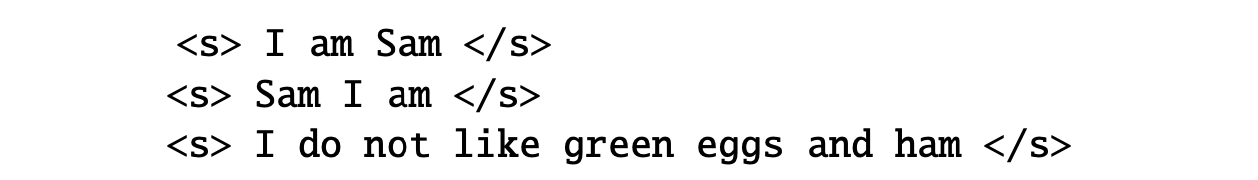
   

In [62]:
corpus = "I am Sam. Sam I am. I do not like green eggs and ham."

bigram_model = Bigram()
bigram_model.train(corpus, show_table=True)

,<s>,</s>,I,am,Sam,do,not,like,green,eggs,and,ham
<s>,0,0,2,0,1,0,0,0,0,0,0,0
</s>,2,0,0,0,0,0,0,0,0,0,0,0
I,0,0,0,2,0,1,0,0,0,0,0,0
am,0,1,0,0,1,0,0,0,0,0,0,0
Sam,0,1,1,0,0,0,0,0,0,0,0,0
do,0,0,0,0,0,0,1,0,0,0,0,0
not,0,0,0,0,0,0,0,1,0,0,0,0
like,0,0,0,0,0,0,0,0,1,0,0,0
green,0,0,0,0,0,0,0,0,0,1,0,0
eggs,0,0,0,0,0,0,0,0,0,0,1,0


* Validate with the examples from the textbook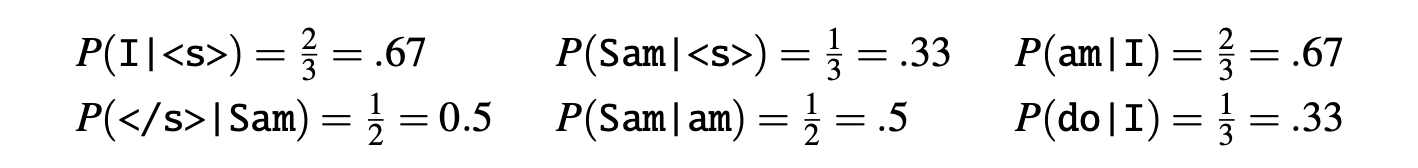

In [63]:
targets = ["<s> I", "<s> Sam", "I am",
           "Sam </s>", "am Sam", "I do"]

for target in targets:
    print("P(" + target.split()[-1] + "|" + target.split()[0] + ") = " + str(round(bigram_model.calculate_bigram(target),2)))


P(I|<s>) = 0.67
P(Sam|<s>) = 0.33
P(am|I) = 0.67
P(</s>|Sam) = 0.5
P(Sam|am) = 0.5
P(do|I) = 0.33


# 

## [3.10] Add an option to your program to generate random sentences.

In [206]:
class Bigram_RG(Bigram):
    def __init__(self):
        Bigram.__init__(self)
    
    """
        Generate Random Sentence
            - generate a random sentence based on the bigram table(=self.bigram_count)
    """
    def generate_random_sentence(self):
        import random
        sentence = []
        token = self.pseudo_init # First token in '<s>'
        while (token != self.pseudo_termin): # Stop until '</s>' appears
            sentence.append(token)
            try: token = random.choices(list(self.bigram_count[token].keys()), 
                                   weights=self.bigram_count[token].values(), k=1)[0]   
            except: print("Error"); break
        sentence.append(self.pseudo_termin)
        return sentence

< Validation >
- Corpus from my recent paper :)

In [207]:
corpus = """The emergence of vibrotactile feedback-embedded hand wearables enables immersive virtual reality~(VR) experience. However, the haptic design process still lags behind its visual counterparts in terms of design freedom and scalability. In response, we present HapticPilot which allows an in-situ haptic experience design for hand wearables in VR. Our system supports design freedom by allowing haptic designers to directly draw haptic traces on the hand to author vibrotactile feedback, requiring no controllers during the process. HapticPilot enables a user-friendly and accessible haptic design process for VR hand interactions. We propose a new concept called phantom grid which enables a posture-adaptive haptic rendering algorithm that creates consistent haptic feedback throughout distinctive hand postures. Moreover, we incorporate multiple phantom sensation techniques to cover haptic feedback over the whole hand. We quantify the perceptual performance of our approach with multiple user studies with qualitative feedback. We also demonstrate applications showing how HapticPilot supports an intuitive, empowering, and responsive haptic authoring framework.
The advancement in graphics and audio technology offers immersive and realistic user experiences for virtual reality~(VR). To further enhance the sense of embodiment, task performance, and immersiveness in VR, incorporating haptic feedback in the forms of tactile and kinesthetic feedback showed promising results. Among various options, researchers came up with wearable tactile feedback devices to provide effective stimulation while maintaining low-cost and small form factors. To support realistic tactile feedback, researchers put a high priority on simulating the sensation of hand touch since the hand is a key interaction medium between the user and the VR.
Researchers have utilized the hand for both interaction and tactile sensation with its high sensitivity and the frequency of its use in various applications. 
To provide an immersive and realistic experience in VR, tactile feedback is often delivered to the hand and forearm regions commonly utilized in touch interactions. To enhance wearability, previous studies employed gloves that incorporated vibration actuators to deliver vibrotactile feedback to the entire hand. 
These works supported limited spatiotemporal haptic experiences like providing discrete sensations over various locations of the hand. 
Recently, researchers demonstrated the performance of tactile rendering utilizing phantom sensation throughout a whole hand. In our work, to support robust whole-hand tactile experiences under various hand postures, we strategically configure vibrotactile actuators by considering hand structure along with designated line(1D) and polygon(2D) based phantom sensations.
Previous haptic rendering approaches with the hand mainly focused on providing tactile sensation to achieve target goals following physics-based interactions in VR. However, the perception of tactile sensation can easily alter based on the associated hand postures. For example, even a small change in the hand configuration can easily affect a human's perceived sensation of vibrotactile feedback. Despite advances in vibrotactile haptic rendering technology, current approaches still fall short in providing consistent and effective tactile sensations for different hand postures, requiring haptic designers to manually design different tactile feedback patterns for different hand postures to maintain similar haptic experiences. This is a huge drawback in VR since hand interactions recently have been gaining increasing attention with high expressiveness and control flexibility. To this end, we propose a hand posture-adaptive haptic rendering algorithm that automatically translates the given haptic design pattern to suit the associated hand postures. Our approach expedites the design process of vibrotactile feedback design by reducing the need for additional design iterations.
The haptic technology has the potential to contribute to the existing VR user experience by enhancing presence as well as effectiveness. However, designing haptic experiences is a highly complicated process since haptic experiences are multisensory and vertically integrated, where small modifications could affect the entire system's design.
This leads to considering various factors for haptic experiences, including ``Design Parameters'', ``Usability Requirements'', ``Experiential Dimensions'' and ``Personalization Support''. Based on these factors, recent works have demonstrated in-situ, instant, and customizable haptic design tools to enable users to compose intuitive and meaningful haptic experience design. Following the same path, we develop an in-situ and whole-hand vibrotactile feedback design tool for VR that acts as a copilot for users. We provide a user-friendly authoring environment by allowing users to freely draw the tactile feedback traces in the form of sketches on the hand with natural hand interactions. 
In this work, we introduce HapticPilot, a haptic design tool enabling hand posture-adaptive vibrotactile feedback design and rendering for VR hand interactions. To the best of our knowledge, no previous studies have suggested a haptic design tool that accommodated various hand postures when prototyping vibrotactile feedback for VR hand interactions. Our authoring framework supports instant playback and customization in VR to maximize the flexibility and quality of the haptic experience design process. We conduct user studies to validate the performance and system usability of our posture-adaptive haptic design tool, including perceptual tests and preference questionnaires. The overall results showed that our approach is empowering, intuitive, and responsive in prototyping vibrotactile feedback for VR hand interactions. Following is a list of our contributions
HapticPilot showed superior performance in rendering digits and alphabets compared to shapes. In Study~1, our algorithm scored higher accuracy in the digit category compared to the shape category. For Study~2, the alphabet scored the highest similarity score of 6 among all. 
However, users rated the usability of Action scenes higher than Puzzle scenes which used familiar alphabet, symbol, and digit in Study~2. We assume this is due to different writing styles of alphabets and digits for people with various backgrounds. For creative patterns used in Action scenes, users were generally satisfied as long as the user ``feels'' the design intention. This also tells that users would set higher standards for vibrotactile feedback conveying preconceived shape information like alphabets and digits.
The occlusion in overlapped hands limits vision technology used in current industrial VR headsets. This not only reduced the system usability but affected the implementation details for the algorithm. Since the current hand tracking system cannot detect the contact relations between fingers or the palm, the contact status had to be inferred from the relative positions of haptic nodes in phantom grid construction. We could overcome this issue by employing haptic gloves with embedded physical sensors. The gloves with EMG or IMU sensors could be alternative to vision-based hand tracking. Moreover, combining the vibrotactile feedback and sensing into a single glove could solve poor posture recognition and finger contact detection.
In this work, the toolkit was designed to support predefined representative hand postures only on the left hand. However, the same algorithm could be mirrored to the right hand to support bimanual haptic design. A future approach would be utilizing the hand posture-capturing functions from commercial SDKs to add and modify users' hand postures freely. Furthermore, we plan to provide HapticPilot as plug-ins that could be integrated into real game development studios. 
Since the algorithm was based on a 2D phantom sensation method, the haptic sketches were drawn in a 2D plane on hand. Also, the supported hand postures were restricted to those where the fingers were either entirely extended or flexed to touch the palm. By integrating other methods such as out-of-the-body sensation, however, we expect to expand the rendering domain into 3D spaces.
We present HapticPilot, an in-situ VR haptic authoring framework with a posture-adaptive haptic rendering algorithm. A new rendering plane, phantom grid was used to design patterns and utilize 1D and 2D phantom sensation to provide whole-hand tactile feedback for various hand postures. In the haptic experience evaluation, we examined the IT and accuracy for 1D & 2D phantom sensation-based whole-hand vibrotactile sensation from 10 participants. In the authoring system usability evaluation, we collected qualitative feedback and an overall SUS score of 81.0 from 10 participants which indicates that design through sketching and hand posture-related features are efficient and user-friendly. Using these observations, we demonstrated application scenarios where HapticPilot enhances VR immersion.
"""

In [210]:
bigram_model2 = Bigram_RG()
bigram_model2.train(corpus)

for i in range(10):
    sentence_list = bigram_model2.generate_random_sentence()
    sentence_str = ""
    for word in sentence_list[1:-1]:
        sentence_str += " " + word
    print(str(i+1) + "." + sentence_str + ".")
    print()

1. HapticPilot supports an intuitive, empowering, and the palm, the IT and responsive in VR to validate the entire hand interactions.

2. We propose a single glove could solve poor posture recognition and alphabets compared to the vibrotactile feedback-embedded hand interactions.

3. A new concept called phantom grid was based on simulating the hand postures.

4. The overall results showed promising results showed superior performance of our approach would set higher than Puzzle scenes higher than Puzzle scenes higher than Puzzle scenes higher standards for people with multiple user experience by allowing haptic experiences.

5. To this work, to be mirrored to be integrated into a whole hand interactions in VR, tactile feedback patterns used in providing discrete sensations for VR.

6. Our approach is a 2D phantom sensation of the perception of tactile sensation can easily affect the forms of hand postures.

7. To the hand interactions.

8. We provide effective stimulation while mainta